# Lab 4: Diputados

El objetivo de este lab es que pongas en práctica tus habilidades de recopilación de datos usando web scraping, así como tu capacidad de analizar dichos datos ya que la información se ecuentra estructurada.

## Instrucciones
Desarrolla un programa que recopile la información de cada disputado listado en la página de gobernación: http://sitl.diputados.gob.mx/LXIV_leg/listado_diputados_buscador.php y recopila la siguiente información:

* Nombre del diputado
* Entidad que representa
* Partido político
* Correo electrónico
* Nivel de escolaridad (secundaria, preparatoria, universidad, maestría, doctorado)
* Iniciativas presentadas y estatus ante el Pleno (Tipo de presentación, totales y aprobadas)

Una vez que tengas toda la información capturada en dataframe haz un análisis basado en las siguientes puntos (tu puedes proponer más):
* Cantidad de diputados por partido político
* Niveles de escolaridad
* Niveles de escolaridad por partido político
* ¿Cómo se ve la cantidad de propuestas realizadas y aprobadas con respecto a?:
    * Partido político
    * Escolaridad

Nota: Acompaña tus análisis con plots que nutran tu análisis

In [4]:
#Importar paqueterias
import requests
import pandas as pd
import numpy as np
import bs4
import re

In [89]:
#Cargar página web de diputados
url = 'http://sitl.diputados.gob.mx/LXIV_leg/listado_diputados_buscador.php'
source = requests.get(url)
source=str(source.content)
#Guardar datos de pagina web en la variable soup
soup=bs4.BeautifulSoup(source)

In [90]:
#Extraer URL
url='http://sitl.diputados.gob.mx/LXIV_leg/'
url1=[i.get('href') for i in soup.findAll('a')]
url1=url1[7:-5]
url=[url+i for i in url1]
url[0]

'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=484'

In [91]:
diputados = pd.DataFrame()
Partido = pd.DataFrame()
#Ciclo para ingresar a cada url 
for i in url[0:]:
    List=[0,0,0,0,0,0]
    #Ingresar a url por cada diputado-->500
    source = requests.get(i)
    source=source.content
    #Guardar los datos 
    soup=bs4.BeautifulSoup(source)
    #Agregar datos como nombre Forma de ser elegido Estado distrito y correo
    Data= soup.findAll('strong')
    #Agregaar datos nombre partido
    partido=soup.findAll('span', {'class':"Estilo71"})[1].text[-4:-1]
    partido=pd.DataFrame([partido])
    
    #Agregar Escolaridad
    Edu=soup.findAll('table',attrs={'align':"center",'width':"760",'border':"0",'cellspacing':"2",'cellpadding':"2"})[1].findAll('tr')
    Edu=[jj.text for jj in Edu]
    if any('Doctorado' in i for i in Edu) :
        Escolaridad='Doctorado'
    elif  any('Maestría' in i for i in Edu):
        Escolaridad='Maestría'
    elif  any('Posgrado' in i for i in Edu):
        Escolaridad='Maestría'
    elif any('Licenciatura' in i for i in Edu):
        Escolaridad='Licienciatura'
    elif any('Especialidad' in i for i in Edu):
        Escolaridad='Licienciatura'
    elif any('Carrera' in i for i in Edu):
        Escolaridad='Licienciatura'
    elif any( 'Pasante' in i for i in Edu):
        Escolaridad='Licienciatura'
    elif any('Bachillerato' in i for i in Edu):
        Escolaridad='Bachillerato'
    elif any('Secundaria' in i for i in Edu):
        Escolaridad='Secundaria'
    elif any('Primaria' in i for i in Edu):
        Escolaridad='Primaria'
    else :
        Escolaridad='Ninguna'
    Escolaridad=pd.DataFrame([Escolaridad])
    

  #todos los datos de la tabla
    List=[0,0,0,0,0,0,0,0,0,0]
    Table=soup.findAll('table',attrs={'align':"center",'width':"775",'border':"0",'cellspacing':"2",'cellpadding':"2"})[1].findAll('td')[3:-1]
    Table=[jj.text for jj in Table]
    cont=0
    for ii in Table:
        if ii=="Adherente":
            List[0]=Table[cont+1]
            List[1]=Table[cont+2]
        elif ii=="De Grupo":
            List[2]=Table[cont+1]
            List[3]=Table[cont+2]
        elif ii=='Diversos Grupos Parlamentarios':
            List[4]=Table[cont+1]
            List[5]=Table[cont+2]
        elif ii=="Iniciante":
            List[6]=Table[cont+1]
            List[7]=Table[cont+2]

        elif ii=="TOTAL":
            List[8]=Table[cont+1]
            List[9]=Table[cont+2]  
        cont+=1
        List=[float(jj) for jj in List]
    
    Data2=pd.DataFrame([" ".join(i)  for i in Data[:-7]]).append(partido).append(Escolaridad).append(List).T
    diputados=diputados.append(Data2)
    diputados

    
diputados

    
    

,0,1,2,3,4,5,0,0,0,1,2,3,4,5,6,7,8,9
0,Dip. Pedro Daniel Abasolo Sánchez,Representación proporcional,México,5,H-275,pedro.abasolo@diputados.gob.mx,ENA,Secundaria,1,0,15,10,0,0,0,0,16,10
0,Dip. Brasil Alberto Acosta Peña,Representación proporcional,México,5,I-301,brasil.acosta@diputados.gob.mx,PRI,Doctorado,43,5,1,0,0,0,1,0,45,5
0,Dip. Miguel Acundo González,Mayoría Relativa,Puebla,1,D-113,miguel.acundo@diputados.gob.mx,PES,Ninguna,11,1,6,1,1,1,6,0,24,3
0,Dip. Marco Antonio Adame Castillo,Representación proporcional,Morelos,4,P-502,marco.adame@diputados.gob.mx,PAN,Maestría,90,6,27,2,2,0,6,0,125,8
0,Dip. Heriberto Marcelo Aguilar Castillo,Mayoría Relativa,Sonora,4,K-405,heriberto.aguilar@diputados.gob.mx,ENA,Licienciatura,7,0,15,10,1,0,0,0,23,10
0,Dip. Ricardo Aguilar Castillo,Mayoría Relativa,México,1,E-138,raguilar.castillo@diputados.gob.mx,PRI,Licienciatura,45,2,1,0,1,0,3,0,50,2
0,Dip. Bonifacio Aguilar Linda,Mayoría Relativa,Veracruz,18,L-431,bonifacio.aguilar@diputados.gob.mx,ENA,Secundaria,9,1,15,10,0,0,0,0,24,11
0,Dip. Leticia Arlett Aguilar Molina,Mayoría Relativa,Chiapas,9,K-383,leticia.aguilar@diputados.gob.mx,ENA,Licienciatura,3,0,15,10,0,0,2,1,20,11
0,Dip. Marcos Aguilar Vega,Representación proporcional,Querétaro,2,J-334,marcos.aguilar@diputados.gob.mx,PAN,Maestría,91,6,27,2,3,0,2,0,123,8
0,Dip. Adriana Aguilar Vázquez,Representación proporcional,San Luis Potosí,2,M-495,aaguilar.vazquez@diputados.gob.mx,ENA,Secundaria,20,1,15,10,0,0,0,0,35,11


In [99]:
diputados.columns = ['Nombre', 'tipo_Elección','Entidad','Distrito',
                     'Circusncripcion', 'Correo electronico','Partido politico', 
                     'Escolaridad','Adherente total', 'Adherente aprobada', 'De grupo total', 
                     'De grupo Aprobada','Diversos Grupos Parlamentarios total','Diversos Grupos Parlamentarios Aprobada',
                     'Iniciante Total','Iniciante Aprobada', 'Total Final','Total aprobada']
diputados=diputados.reset_index(drop=True)
diputados.head()
diputados.to_csv(r'diputados.csv')

In [11]:
diputados=pd.read_csv('diputados.csv')

In [13]:
diputados['Partido politico'][diputados['Partido politico']=='ENA']='Morena'
diputados['Partido politico'][diputados['Partido politico']=='(PT']='PT'
diputados['Partido politico'][diputados['Partido politico']=='(MC']='MC'
diputados['Partido politico'][diputados['Partido politico']=='ido']='Sin Partido'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [14]:
diputados[diputados['Escolaridad']=='Ninguna']

,Unnamed: 0,Nombre,tipo_Elección,Entidad,Distrito,Circusncripcion,Correo electronico,Partido politico,Escolaridad,Adherente total,Adherente aprobada,De grupo total,De grupo Aprobada,Diversos Grupos Parlamentarios total,Diversos Grupos Parlamentarios Aprobada,Iniciante Total,Iniciante Aprobada,Total Final,Total aprobada
2,2,Dip. Miguel Acundo González,Mayoría Relativa,Puebla,1,D-113,miguel.acundo@diputados.gob.mx,PES,Ninguna,11.0,1.0,6.0,1.0,1.0,1.0,6.0,0.0,24.0,3.0
11,11,Dip. Maribel Aguilera Chairez,Mayoría Relativa,Durango,3,E-150,maribel.aguilera@diputados.gob.mx,Morena,Ninguna,1.0,0.0,15.0,10.0,0.0,0.0,0.0,0.0,16.0,10.0
12,12,Dip. José Guadalupe Aguilera Rojas,Mayoría Relativa,Michoacán,11,L-420,josegpe.aguilera@diputados.gob.mx,PRD,Ninguna,13.0,0.0,41.0,1.0,2.0,0.0,7.0,0.0,63.0,1.0
21,21,Dip. Ma. Guadalupe Almaguer Pardo,Mayoría Relativa,San Luis Potosí,6,L-418,guadalupe.almaguer@diputados.gob.mx,PRD,Ninguna,11.0,0.0,41.0,1.0,6.0,0.0,10.0,0.0,68.0,1.0
24,24,Dip. María Ester Alonzo Morales,Mayoría Relativa,Yucatán,2,K-384,maria.alonzo@diputados.gob.mx,PRI,Ninguna,48.0,4.0,1.0,0.0,6.0,0.0,6.0,0.0,61.0,4.0
30,30,Dip. Julio César Angeles Mendoza,Mayoría Relativa,Hidalgo,5,A-018,julio.angeles@diputados.gob.mx,Morena,Ninguna,8.0,3.0,15.0,10.0,0.0,0.0,3.0,0.0,26.0,13.0
33,33,Dip. Edgar Eduardo Arenas Madrigal,Mayoría Relativa,México,37,J-368,edgar.arenas@diputados.gob.mx,Morena,Ninguna,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0
40,40,Dip. Karen Ivette Audiffred Fernández,Mayoría Relativa,Ciudad de México,21,F-183,,Morena,Ninguna,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
55,55,Dip. Maria del Carmen Bautista Peláez,Mayoría Relativa,Oaxaca,9,H-261,maria.bautista@diputados.gob.mx,Morena,Ninguna,5.0,0.0,15.0,10.0,1.0,0.0,3.0,1.0,24.0,11.0
57,57,Dip. Mónica Bautista Rodríguez,Representación proporcional,México,5,M-462,monica.bautista@diputados.gob.mx,PRD,Ninguna,11.0,0.0,41.0,1.0,1.0,0.0,4.0,0.0,57.0,1.0


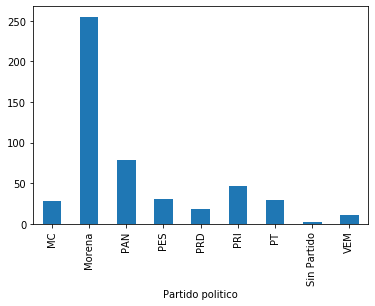

In [40]:
diputados.groupby('Partido politico').apply( lambda x : x.count()).iloc[:,1].plot.bar()

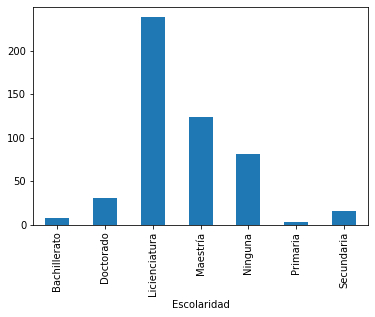

In [9]:
diputados.groupby('Escolaridad',).apply( lambda x : x.count()).iloc[:,1].plot.bar()

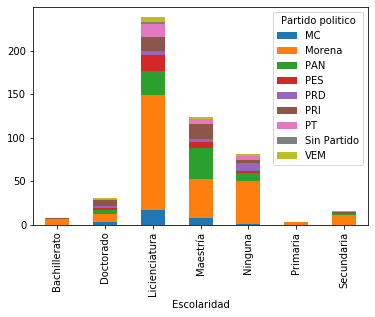

In [63]:
diputados.groupby([ 'Partido politico','Escolaridad'])['Escolaridad'].count().unstack('Partido politico').plot(kind='bar',stacked=True,)

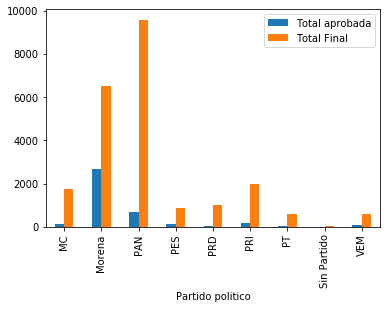

In [70]:
diputados.groupby([ 'Partido politico'])['Total aprobada','Total Final'].sum().plot(kind='bar')
#Pan propone mucho más que morena 

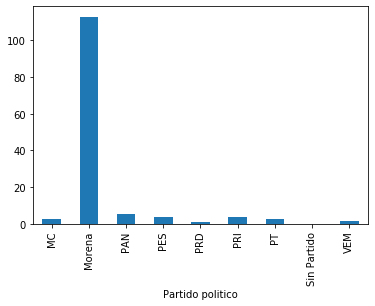

In [74]:
diputados['TA']=diputados['Total aprobada']/diputados['Total Final']
diputados.groupby([ 'Partido politico'])['TA'].sum().plot(kind='bar')
#total de propuestas aporbadas entre propuestas finales  vemos que morena cuenta con una mayor aprobación debido a
# cuenta con mayoria, propone menos  que PAN